In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns


In [3]:
%pip install openpyxl

In [6]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [7]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [9]:
df.columns.isnull()


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [12]:
df.duplicated().value_counts()

,count
False,102058
True,541




1.  541 duplicated data is found
2.   no null values is found
3.   outliers present







In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [16]:
#drop all records with missing values
df.dropna(inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68712 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              68712 non-null  int64         
 1   NAME                            68712 non-null  object        
 2   host id                         68712 non-null  int64         
 3   host_identity_verified          68712 non-null  object        
 4   host name                       68712 non-null  object        
 5   neighbourhood group             68712 non-null  object        
 6   neighbourhood                   68712 non-null  object        
 7   lat                             68712 non-null  float64       
 8   long                            68712 non-null  float64       
 9   country                         68712 non-null  object        
 10  country code                    68712 non-null  object        
 11  instan

In [26]:
#change all mismatch datatype
df['price'] = df['price'].astype(float)
#get rid of outliers
df = df[df['price'] < 1000]
df = df.drop(df[df['availability 365']>500].index)

/tmp/ipython-input-2750472672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)


In [17]:
# Check the number of unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

id: 83390 unique values
NAME: 50533 unique values
host id: 83390 unique values
host_identity_verified: 2 unique values
host name: 11647 unique values
neighbourhood group: 6 unique values
neighbourhood: 223 unique values
lat: 20719 unique values
long: 16865 unique values
country: 1 unique values
country code: 1 unique values
instant_bookable: 2 unique values
cancellation_policy: 3 unique values
room type: 4 unique values
Construction year: 20 unique values
price: 1151 unique values
service fee: 231 unique values
minimum nights: 122 unique values
number of reviews: 469 unique values
last review: 2435 unique values
reviews per month: 1012 unique values
review rate number: 5 unique values
calculated host listings count: 77 unique values
availability 365: 438 unique values


In [27]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,6.871200e+04,6.871200e+04,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712.000000,68712,68712.000000,68712.000000,68712.000000,68712.000000
mean,2.958224e+07,4.912112e+10,40.727510,-73.948549,0.498064,2012.501557,524.983249,104.996405,7.437391,32.178309,2019-06-10 08:02:37.177785344,1.371582,3.286966,7.036224,141.612295
min,1.001254e+06,1.236005e+08,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.542106e+07,2.437550e+10,40.687670,-73.982143,0.000000,2008.000000,288.000000,58.000000,2.000000,3.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,3.079323e+07,4.888486e+10,40.721345,-73.953760,0.000000,2012.000000,524.000000,105.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,100.000000
75%,4.330406e+07,7.375748e+10,40.762730,-73.931050,1.000000,2018.000000,760.000000,152.000000,5.000000,38.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,266.000000
max,5.735803e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,999.000000,200.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.621156e+07,2.852600e+10,0.056390,0.050390,0.500000,5.761081,273.261311,54.654178,30.036898,51.780366,NaN,1.742175,1.283222,29.564039,133.436232


In [28]:
property_type = df['room type'].value_counts().to_frame()

In [29]:
property_type

,count
room type,
Entire home/apt,36476
Private room,30794
Shared room,1352
Hotel room,90


Text(0.5, 1.0, 'Room Type Distribution')

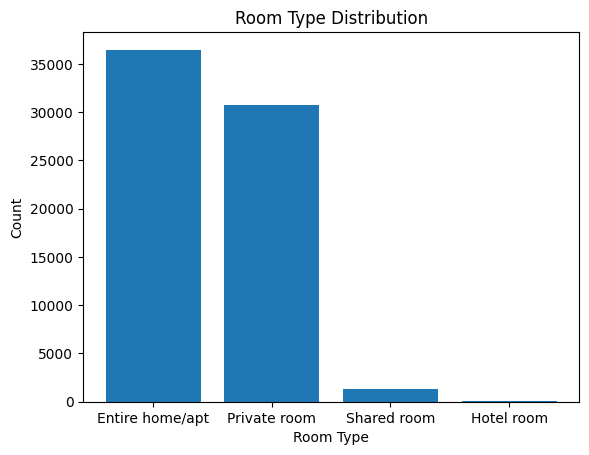

In [32]:
#room type on barchart
room_type_bar = plt.bar(property_type.index, property_type.loc[:,"count"]);
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')

Text(0, 0.5, 'Count')

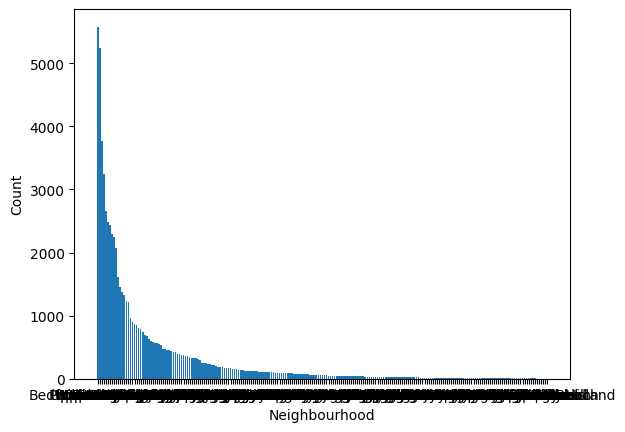

In [33]:
#neighbourhood with highest number of listing
hood_grp = plt.bar(df['neighbourhood'].value_counts().index, df['neighbourhood'].value_counts().values);
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

Text(0.5, 1.0, 'Top 10 Average Price by Neighbourhood')

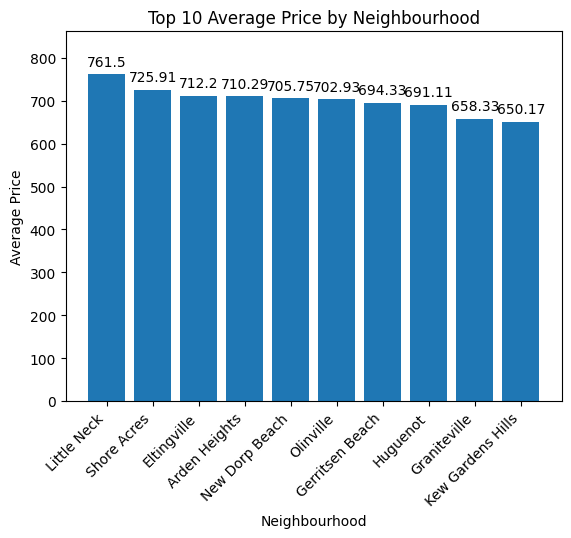

In [36]:
#which has highest average price for airbnb listings?
avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).to_frame()
# Select the top 10 neighbourhoods
top_10_avg_price = avg_price.head(10)
avg_price_bar = plt.bar(top_10_avg_price.index, top_10_avg_price.loc[:,"price"]);
plt.bar_label(avg_price_bar,labels=round(top_10_avg_price.loc[:,"price"],2),label_type='edge',padding=4);
plt.ylim([0,top_10_avg_price.loc[:,"price"].max() + 100]); # Adjust y-limit based on top 10 prices
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation = 45, ha='right'); # Adjust rotation and alignment for better readability
plt.title('Top 10 Average Price by Neighbourhood')

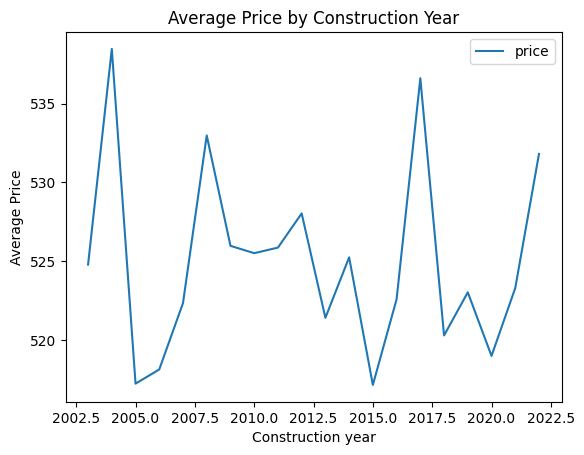

In [38]:
#is there ant relationship between the construction year of property and pric?
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel('Construction year')  ;
plt.ylabel('Average Price');
plt.title('Average Price by Construction Year');

Text(0.5, 1.0, 'Top 10 Hosts by Calculated Host Listings Count')

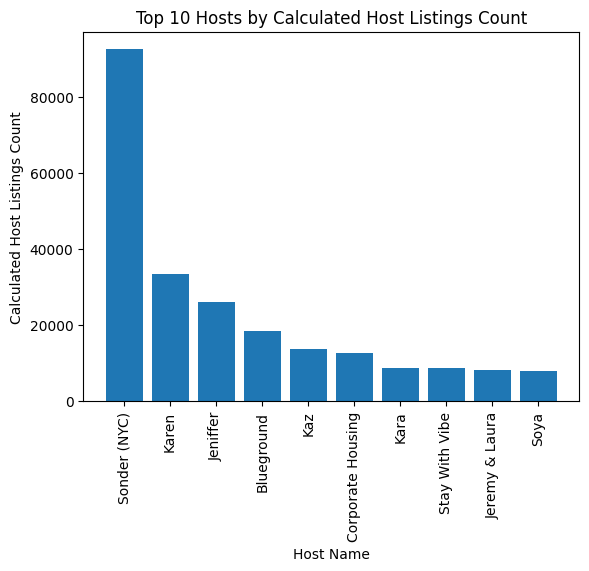

In [40]:
#whor the top10 hosts by calculated host listing count?
top_10_hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).head(10)
plt.bar(top_10_hosts.index, top_10_hosts.values)
plt.xlabel('Host Name')
plt.xticks(rotation = 90)
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')

Text(0.5, 1.0, 'Average Review Rate by Host Identity Verification')

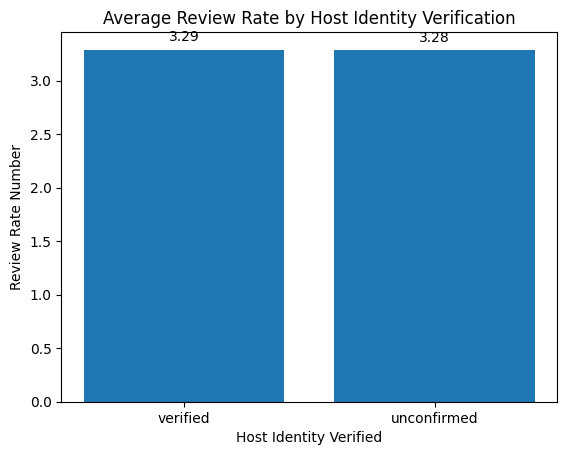

In [44]:
# are hosts with verified identities more likely to receive positive reviews
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review_bar = plt.bar(review.index, review.loc[:,"review rate number"])
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2),label_type='edge',padding=4);
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate by Host Identity Verification')

Text(0.5, 1.0, 'Price vs Service Fee')

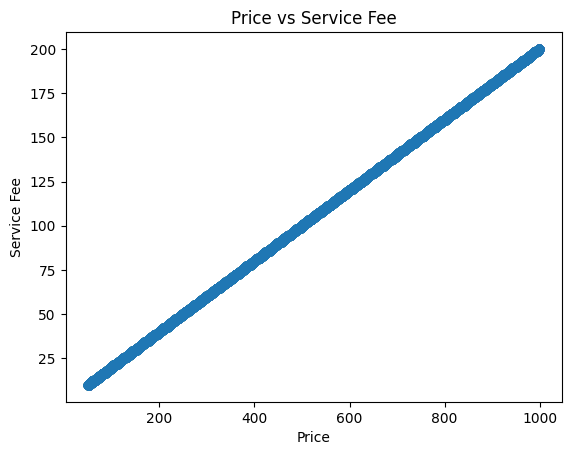

In [45]:
sns.regplot(df,x='price',y='service fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Price vs Service Fee')

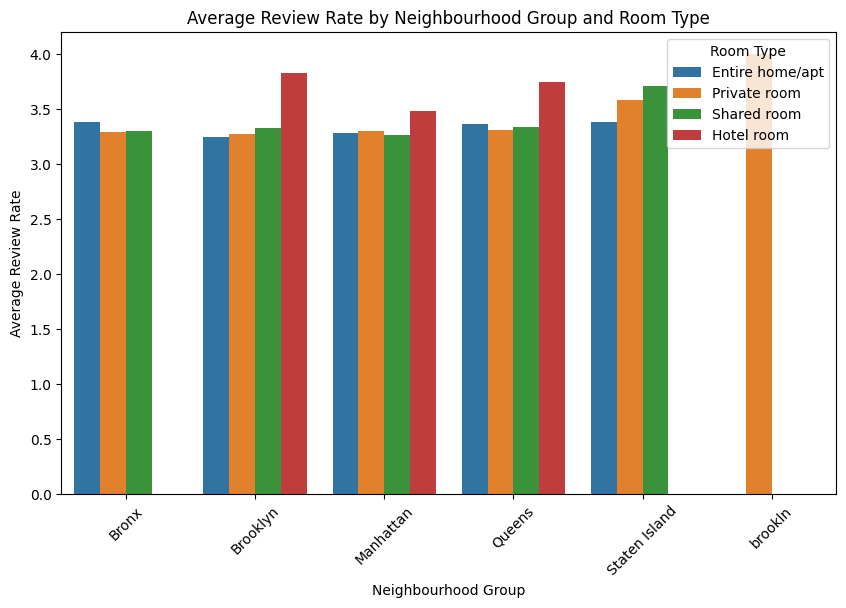

In [46]:
#what is the averagr review rate for each room/property type in each neighbourhood group
review_rate = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
review_rate
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='review rate number', hue='room type', data=review_rate)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate by Neighbourhood Group and Room Type')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

Text(0.5, 1.0, 'Calculated Host Listings Count vs Availability 365')

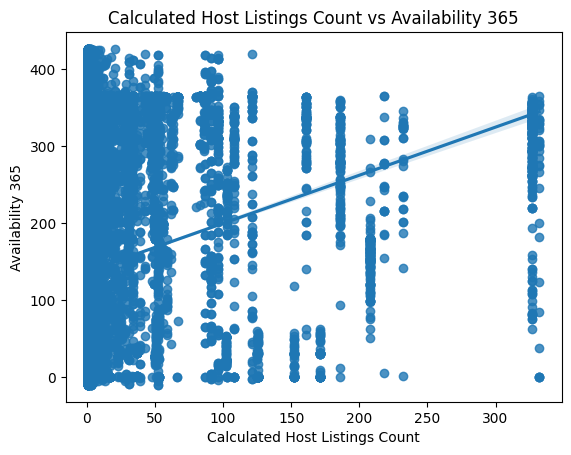

In [47]:
# are hosts with a higher calculated host listings count more likely to maintain higher availability throghout the year?
sns.regplot(df,x='calculated host listings count',y='availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Calculated Host Listings Count vs Availability 365')

In [48]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1383133555607184)